# Project 1 TAA - SVM Model

In [24]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#to load matlab mat files
from scipy.io import loadmat

#SVC
from sklearn.svm import SVC

In [25]:
filename = "../datasets/train/angry_fear_happy_neutral_sad_surprise.mat"
mat=loadmat(filename)

# mat is a dict with key "X" for x-values, and key "y" for y values
X=mat["X"]
y=mat["y"]

filename = "../datasets/dev/angry_fear_happy_neutral_sad_surprise.mat"
mat=loadmat(filename)

# mat is a dict with key "X" for x-values, and key "y" for y values
Xval=mat["X"]
yval=mat["y"]

filename = "../datasets/test/angry_fear_happy_neutral_sad_surprise.mat"
mat=loadmat(filename)

# mat is a dict with key "X" for x-values, and key "y" for y values
Xtest=mat["X"]
ytest=mat["y"]

#number of training examples
m = len(X)

print(f"Loaded {X.shape[0]} traing examples, each with {X.shape[1]} features (pixels).")
print(f"Loaded {Xval.shape[0]} validation examples, each with {X.shape[1]} features (pixels).")

Loaded 6000 traing examples, each with 2304 features (pixels).
Loaded 1200 validation examples, each with 2304 features (pixels).


In [31]:
def dataset3Params(X, y, Xval, yval,vals_C, vals_gamma):
    """
    dataset3Params returns the optimal C and gamma(1/sigma) based on a cross-validation set.
    """
    acc = 0
    best_C=0
    best_gamma=0
    scores_hist=[]
    for C in vals_C:
        for gamma in vals_gamma:
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            scores_hist.append((C,gamma,score))
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma,scores_hist

### Best C and gamma

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769


In [32]:
vals_C = [0.001, 0.01, 0.1, 1, 10, 100]
vals_gamma = [0.001, 0.01, 0.1, 1, 10, 100]
best_C, best_gamma, scores_hist= dataset3Params(X, y.ravel(), Xval, yval.ravel(),vals_C,vals_gamma)

#What are the best C and sigma ?
print("Best C " + str(best_C) + " Best Gamma " + str(best_gamma))

Best C 10 Best Gamma 0.01


(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

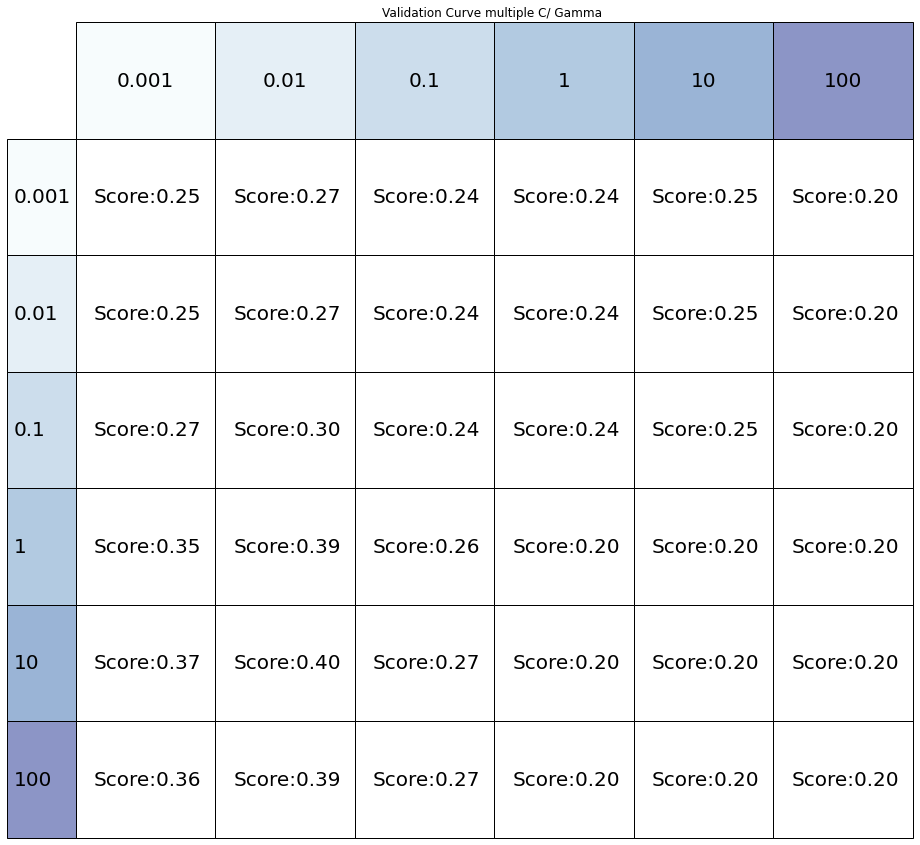

In [39]:
n= len(vals_C)
m=len(vals_gamma)

data = np.array([f'Score:{score[2]:.2f}' for score in scores_hist]).reshape((n,m))

plt.figure(figsize=(15,15))

colors = plt.cm.BuPu(np.linspace(0, 0.5, n))
colorsCols = plt.cm.BuPu(np.linspace(0, 0.5, m))
the_table = plt.table(cellText=data,rowLabels=vals_C,rowColours=colors,colLabels=vals_gamma, colColours=colorsCols, loc='center',bbox=[0.0,0,1,1])
the_table.set_fontsize(20)
plt.title("Validation Curve multiple C/ Gamma ")
plt.axis('off')
plt.axis('tight')

In [33]:
#Build an SVM classifier with the best C and gamma and get classifier score of about 95% ?
classifier = SVC(gamma=best_gamma,C=best_C, kernel="rbf")

# Merge validation and train datasets and get error
X_train_dev= np.concatenate((X,Xval))
y_train_dev= np.concatenate((y,yval))

classifier.fit(X_train_dev,np.ravel(y_train_dev))
print(classifier.score(Xtest,ytest))

0.375


In [35]:
import json

scores={'score_hist':scores_hist}
with open('score.json', 'w') as json_file:
    json.dump(scores, json_file)